<a href="https://colab.research.google.com/github/Alzategelizabeth/Cartografia-/blob/main/Taller5/Seleccion_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


##**INVENTARIO**

In [3]:
#Libreria
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(821560,)

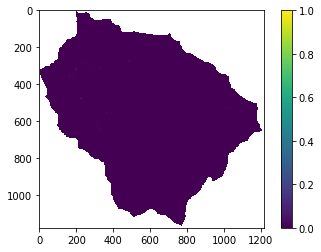

In [4]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/InventariMenM.tif?raw=true')
inventario=raster.read(1)
inventario=np.where(inventario==15,0,inventario)
raster_mask = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente.tif?raw=true')
msk=raster_mask.read_masks(1) #sirve para arreglar datos incompletos
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)] # para eliminar  del vector los datos No data y dejar solo los que tienen datos en la cuenca
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape


In [5]:
np.unique(inventario_vector_MenM)

array([0., 1.])

##**SELECCIÓN DE VARIABLES**




**PENDIENTE**

In [6]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #libreria para graficar
from pandas import DataFrame
import statsmodels.graphics.api as smg #libreria de estadistica

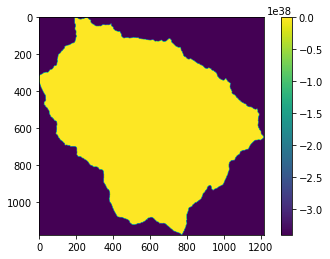

In [7]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente.tif?raw=true')
pendiente=raster.read(1)
plt.imshow(pendiente)
plt.colorbar();

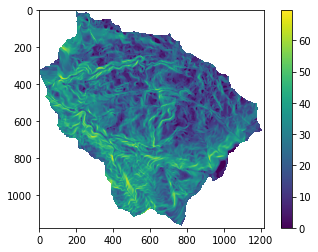

In [8]:
#Se busca que se tomen los NoData correctamente
pendiente=np.where(pendiente<0,np.nan,pendiente)#np.where--cambia los valores menores a 0
plt.imshow(pendiente)
plt.colorbar()

In [9]:
np.shape(pendiente)#conocer el tamaño de la matriz

(1178, 1217)

In [10]:
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos No data y dejar solo los que tienen datos en la cuenca
pendiente_vector_MenM.shape

(821560,)

In [11]:
~np.isnan(pendiente_vector)

array([False, False, False, ..., False, False, False])

**ASPECTO**

(821560,)

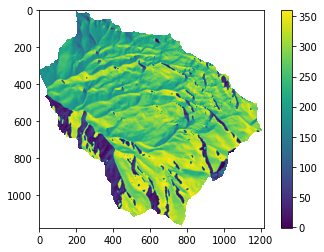

In [12]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/aspecto.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

**CURVATURA**

(821560,)

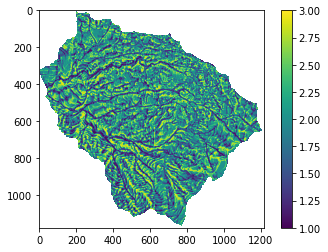

In [13]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/curvaturareclassify.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura>3,np.nan,curvatura)
raster_mask = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
curvatura=msk*curvatura
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar()
np.unique(curvatura)
curvatura_vector_MenM.shape

In [ ]:
curvatura_vector_MenM.shape

(821560,)

In [ ]:
np.unique(curvatura_vector_MenM)

array([1., 2., 3.])

**GEOLOGÍA**

(821560,)

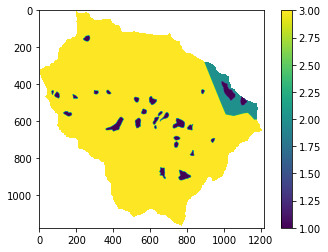

In [14]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/geologia.tif?raw=true')
geologia=raster.read(1)
raster_mask = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
geologia=msk*geologia
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar()
geologia_vector_MenM.shape

In [15]:
np.unique(geologia)

array([ 1.,  2.,  3., nan])

**GEOMORFOLOGÍA**

(821560,)

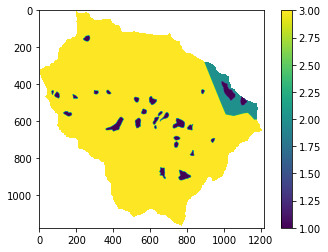

In [16]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/subunidades.tif?raw=true')
geomorfologia=raster.read(1)
raster_mask = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
geomorfologia=msk*geologia
geomorfologia_vector=geomorfologia.ravel()
geomorfologia_vector_MenM=geomorfologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geomorfologia)
plt.colorbar()
geomorfologia_vector_MenM.shape

In [ ]:
np.unique(geomorfologia)

array([ 1.,  2.,  3., nan])

**FLUJO ACUMULADO**

(821560,)

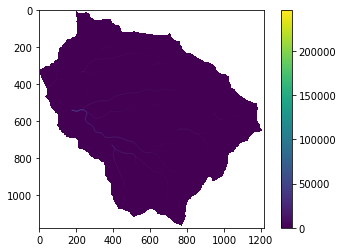

In [17]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/flowacc2.tif?raw=true')
flujo=raster.read(1)
raster_mask = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
flujo=msk*flujo
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
flujo_vector_MenM=flujo_vector_MenM+np.ones(np.shape(flujo_vector_MenM)[0])
plt.imshow(flujo)
plt.colorbar()
flujo_vector_MenM.shape

In [ ]:
np.unique(flujo_vector_MenM)

array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 2.45514e+05,
       2.45784e+05, 2.45877e+05])

##**DATA FRAME**

In [18]:
d={'inventario':inventario_vector_MenM,'geomorfologia':geomorfologia_vector_MenM,'geologia':geologia_vector_MenM,'flujo':flujo_vector_MenM,'pendiente':pendiente_vector_MenM,'aspecto':aspecto_vector_MenM,'curvatura':curvatura_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))

['inventario', 'geomorfologia', 'geologia', 'flujo', 'pendiente', 'aspecto', 'curvatura']


In [19]:
df.head()

,inventario,geomorfologia,geologia,flujo,pendiente,aspecto,curvatura
0,0.0,3.0,3.0,8.0,35.672390,138.732468,1.0
1,0.0,3.0,3.0,9.0,35.078232,137.794312,1.0
2,0.0,3.0,3.0,10.0,32.974354,140.078018,1.0
3,0.0,3.0,3.0,11.0,34.152977,142.213806,1.0
4,0.0,3.0,3.0,1.0,15.028431,111.181129,3.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821560 entries, 0 to 821559
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   inventario     821560 non-null  float64
 1   geomorfologia  821560 non-null  float64
 2   geologia       821560 non-null  float64
 3   flujo          821560 non-null  float64
 4   pendiente      821560 non-null  float32
 5   aspecto        821560 non-null  float32
 6   curvatura      821560 non-null  float64
dtypes: float32(2), float64(5)
memory usage: 37.6 MB


**MUESTREO**

In [21]:
df1=df[(df["inventario"]==1) | (df["inventario"]==0).sample(frac=.1)]#se genera un df que solo trabaja con  el 10%
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82203 entries, 5 to 821558
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   inventario     82203 non-null  float64
 1   geomorfologia  82203 non-null  float64
 2   geologia       82203 non-null  float64
 3   flujo          82203 non-null  float64
 4   pendiente      82203 non-null  float32
 5   aspecto        82203 non-null  float32
 6   curvatura      82203 non-null  float64
dtypes: float32(2), float64(5)
memory usage: 4.4 MB


In [22]:
resumen=df1.describe().T
print(resumen)

                 count        mean          std  min         25%         50%  \
inventario     82203.0    0.000633     0.025143  0.0    0.000000    0.000000   
geomorfologia  82203.0    2.902218     0.386728  1.0    3.000000    3.000000   
geologia       82203.0    2.902218     0.386728  1.0    3.000000    3.000000   
flujo          82203.0  253.570879  3684.266329  1.0    6.000000   15.000000   
pendiente      82203.0   26.634092    11.888725  0.0   17.841556   26.381462   
aspecto        82203.0  239.175629    93.402077 -1.0  206.715889  263.394196   
curvatura      82203.0    1.994209     0.738234  1.0    1.000000    2.000000   

                      75%            max  
inventario       0.000000       1.000000  
geomorfologia    3.000000       3.000000  
geologia         3.000000       3.000000  
flujo           32.000000  245784.000000  
pendiente       34.955002      68.674576  
aspecto        305.191208     359.999054  
curvatura        3.000000       3.000000  


In [23]:
matriz=df.drop(['inventario'],axis=1) # función para eliminar una columna (axis=1)
matriz.head()

,geomorfologia,geologia,flujo,pendiente,aspecto,curvatura
0,3.0,3.0,8.0,35.672390,138.732468,1.0
1,3.0,3.0,9.0,35.078232,137.794312,1.0
2,3.0,3.0,10.0,32.974354,140.078018,1.0
3,3.0,3.0,11.0,34.152977,142.213806,1.0
4,3.0,3.0,1.0,15.028431,111.181129,3.0


In [24]:
matriz_cont=matriz.drop(['geologia','geomorfologia','curvatura'],axis=1)
matriz_cont.head()

,flujo,pendiente,aspecto
0,8.0,35.672390,138.732468
1,9.0,35.078232,137.794312
2,10.0,32.974354,140.078018
3,11.0,34.152977,142.213806
4,1.0,15.028431,111.181129


##**Análisis de todas las variables**

In [ ]:
 pd.plotting.scatter_matrix(matriz_cont, alpha = 0.3, figsize = (14,10), diagonal='kde')#análisis de de variables continuas

In [ ]:
sns.pairplot(df1, hue='inventario')

In [ ]:
matriz.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 6))# para conocer la densidad de los datos

In [ ]:
MatCorre=DataFrame(df.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns))

#**Análisis univariado**

**Pendiente**

Text(0, 0.5, 'Frecuencia')

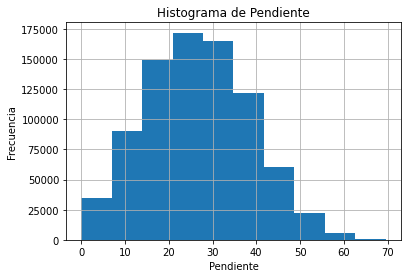

In [ ]:
df.pendiente.hist()
plt.title('Histograma de Pendiente')
plt.xlabel('Pendiente')
plt.ylabel('Frecuencia')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbf00922a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbf009264d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbf009224d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbf00926f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbf0092d510>],
 'means': []}

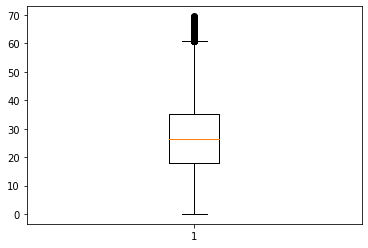

In [ ]:
plt.boxplot(df['pendiente'])

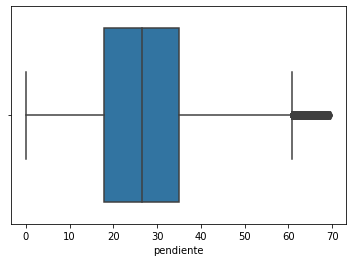

In [ ]:
sns.boxplot(x='pendiente', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


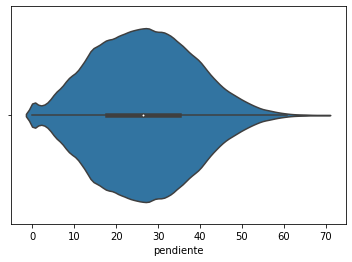

In [ ]:
sns.violinplot(df['pendiente'])

**Aspecto**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


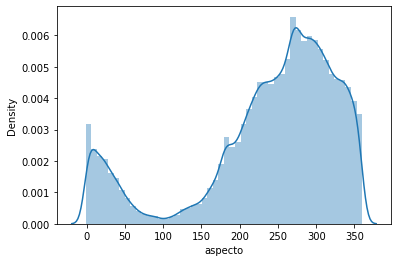

In [ ]:
sns.distplot(df['aspecto'])

**Geología**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


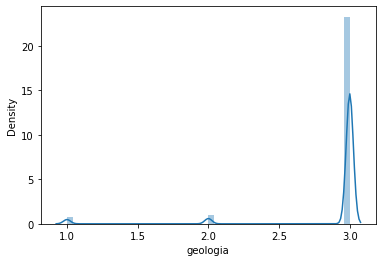

In [ ]:
sns.distplot(df['geologia'])

**Geomorfología**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


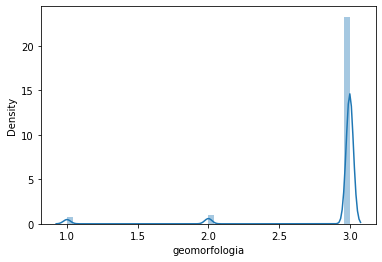

In [ ]:
sns.distplot(df['geomorfologia'])

#**Análisis multivariado**

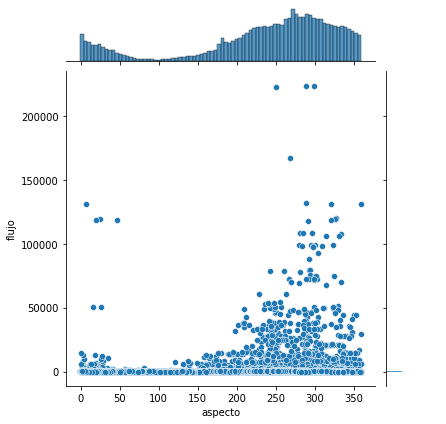

In [ ]:
sns.jointplot(x='aspecto', y='flujo', data=df1, kind='scatter')

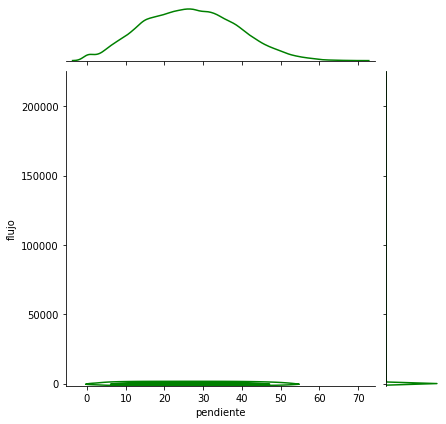

In [ ]:
sns.jointplot(x='pendiente', y='flujo', data=df1, kind='kde', color='g')

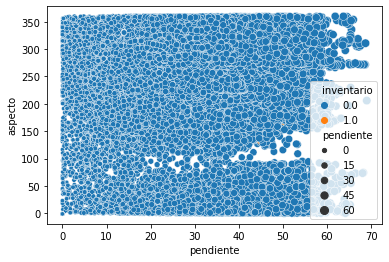

In [ ]:
sns.scatterplot(x="pendiente", y="aspecto", hue="inventario", size='pendiente',data=df1)

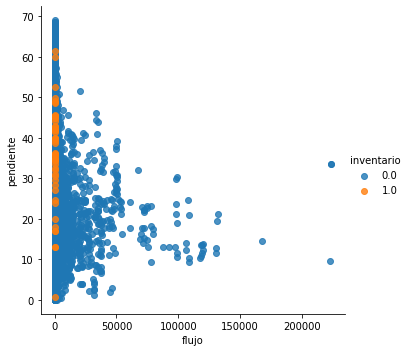

In [ ]:
sns.lmplot('flujo', 'pendiente', data=df1, hue='inventario', fit_reg=False)

##**Correlación con variable dependiente**

In [ ]:
media=df.groupby('inventario').mean()
print(media)

            geomorfologia  geologia       flujo  pendiente     aspecto  \
inventario                                                               
0.0              2.901215  2.901215  250.036832  26.675219  238.634521   
1.0              2.942308  2.942308   11.480769  36.314430  201.736664   

            curvatura  
inventario             
0.0          1.991965  
1.0          2.211538  


In [ ]:
#Para contar el numero de celdas con y sin MenM
df['inventario'].value_counts()

0.0    821508
1.0        52
Name: inventario, dtype: int64